TABLE OF CONTENT
I. DATA DESCRIPTION 
II. IMPORTING PACKAGE ANS DATA CLEANING 
III. EXPLORING DATA ANALYSIS 
IV. DATA PREMODELING 
V. DATA MODELING VI. CONCLUSION
                             ++++++++++++++++++++++++++++++++++++++++++
I.DATA DESCRIPTION
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.
There are two datasets: 1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010). 2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv. The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM). The classification goal is to predict if the client will subscribe a term deposit (variable y).
Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)
Number of Attributes: 16 + output attribute.
Attribute information:
Input variables: 
    1 - age (numeric) 
    2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self employed","retired","technician","services") 
    3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed) 
    4 - education (categorical: "unknown","secondary","primary","tertiary") 
    5 - default: has credit in default? (binary: "yes","no") 
    6 - balance: average yearly balance, in euros (numeric
    7 - housing: has housing loan? (binary: "yes","no") 
    8 - loan: has personal loan? (binary: "yes","no") 
    9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
    10 - day: last contact day of the month (numeric) 
    11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") 
    12 - duration: last contact duration, in seconds (numeric) 
    13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 
    14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted) 
    15 - previous: number of contacts performed before this campaign and for this client (numeric) 
    16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
Output variable (desired target): 
    17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

II. IMPORTING PACKAGE AND CLEANING DATA

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('/Users/sophengsok/Documents/DataScience/1 Capstone Project/bank-full.csv')

In [2]:
data

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [3]:
# Seperating Columns 
Bank=data['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(';',n=16,expand=True)

In [4]:
Bank

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [5]:
# Rename Columns
Bank.rename(columns={0:'Age',1:'Job',2:'Marital',3:'Education',4:'Default',5:'Balance',6:'Housing',7:'Loan',8:'Contact',9:'Day',10:'Month',11:'Duration',12:'Campaign',13:'Pdays',14:'Previous',15:'Poutcome',16:'Deposit'},inplace=True)

In [6]:
Bank

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Deposit
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [7]:
# Clearing dataset by removing quotations on each elements in dataset

for col in Bank.columns:
    Bank[col]=Bank[col].str.replace(r'\W','')
print(Bank)

/var/folders/zm/pjfj84dx07df_wwx0sbd5j9r0000gn/T/ipykernel_7040/3336170806.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  Bank[col]=Bank[col].str.replace(r'\W','')


      Age           Job   Marital  Education Default Balance Housing Loan  \
0      58    management   married   tertiary      no    2143     yes   no   
1      44    technician    single  secondary      no      29     yes   no   
2      33  entrepreneur   married  secondary      no       2     yes  yes   
3      47    bluecollar   married    unknown      no    1506     yes   no   
4      33       unknown    single    unknown      no       1      no   no   
...    ..           ...       ...        ...     ...     ...     ...  ...   
45206  51    technician   married   tertiary      no     825      no   no   
45207  71       retired  divorced    primary      no    1729      no   no   
45208  72       retired   married  secondary      no    5715      no   no   
45209  57    bluecollar   married  secondary      no     668      no   no   
45210  37  entrepreneur   married  secondary      no    2971      no   no   

         Contact Day Month Duration Campaign Pdays Previous Poutcome Deposi

In [8]:
Bank

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,1,0,unknown,no
3,47,bluecollar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,bluecollar,married,secondary,no,668,no,no,telephone,17,nov,508,4,1,0,unknown,no


In [9]:
Bank.shape

(45211, 17)

In [10]:
# Checking Summary of Data
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        45211 non-null  object
 1   Job        45211 non-null  object
 2   Marital    45211 non-null  object
 3   Education  45211 non-null  object
 4   Default    45211 non-null  object
 5   Balance    45211 non-null  object
 6   Housing    45211 non-null  object
 7   Loan       45211 non-null  object
 8   Contact    45211 non-null  object
 9   Day        45211 non-null  object
 10  Month      45211 non-null  object
 11  Duration   45211 non-null  object
 12  Campaign   45211 non-null  object
 13  Pdays      45211 non-null  object
 14  Previous   45211 non-null  object
 15  Poutcome   45211 non-null  object
 16  Deposit    45211 non-null  object
dtypes: object(17)
memory usage: 5.9+ MB


In [11]:
# Changing Datatype 

Bank['Age']=Bank['Age'].astype(int)

In [12]:
Bank['Balance']=Bank['Balance'].astype(int)

In [13]:
Bank['Day']=Bank.Day.astype(int)

In [14]:
Bank['Duration']=Bank.Duration.astype(int)

In [15]:
Bank['Campaign']=Bank['Campaign'].astype(int)

In [16]:
Bank['Pdays']=Bank.Pdays.astype(int)

In [17]:
Bank['Previous']=Bank.Previous.astype(int)

In [18]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        45211 non-null  int64 
 1   Job        45211 non-null  object
 2   Marital    45211 non-null  object
 3   Education  45211 non-null  object
 4   Default    45211 non-null  object
 5   Balance    45211 non-null  int64 
 6   Housing    45211 non-null  object
 7   Loan       45211 non-null  object
 8   Contact    45211 non-null  object
 9   Day        45211 non-null  int64 
 10  Month      45211 non-null  object
 11  Duration   45211 non-null  int64 
 12  Campaign   45211 non-null  int64 
 13  Pdays      45211 non-null  int64 
 14  Previous   45211 non-null  int64 
 15  Poutcome   45211 non-null  object
 16  Deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [19]:
# Checking summary statistic of numerical columns

Bank.describe()

,Age,Balance,Day,Duration,Campaign,Pdays,Previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1415.196081,15.806419,258.163080,2.763841,41.832563,0.580323
std,10.618762,3020.529906,8.322476,257.527812,3.098021,99.456849,2.303441
min,18.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,137.000000,8.000000,103.000000,1.000000,1.000000,0.000000
50%,39.000000,485.000000,16.000000,180.000000,2.000000,1.000000,0.000000
75%,48.000000,1436.000000,21.000000,319.000000,3.000000,1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [20]:
# Checking Missing Value and Duplicate value of Data

Bank.isna().sum()

Age          0
Job          0
Marital      0
Education    0
Default      0
Balance      0
Housing      0
Loan         0
Contact      0
Day          0
Month        0
Duration     0
Campaign     0
Pdays        0
Previous     0
Poutcome     0
Deposit      0
dtype: int64

In [21]:
Bank.duplicated().value_counts()

False    45211
dtype: int64

In [22]:
# Checking Values count of each categories and visualization 

Bank_count=Bank.select_dtypes('object').columns
for col in Bank_count:
    print(Bank[col].value_counts())
    print('=======================')

bluecollar      9732
management      9458
technician      7597
admin           5171
services        4154
retired         2264
selfemployed    1579
entrepreneur    1487
unemployed      1303
housemaid       1240
student          938
unknown          288
Name: Job, dtype: int64
married     27214
single      12790
divorced     5207
Name: Marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: Education, dtype: int64
no     44396
yes      815
Name: Default, dtype: int64
yes    25130
no     20081
Name: Housing, dtype: int64
no     37967
yes     7244
Name: Loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: Contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: Month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: Poutcome, dtype: int64
no     39922


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


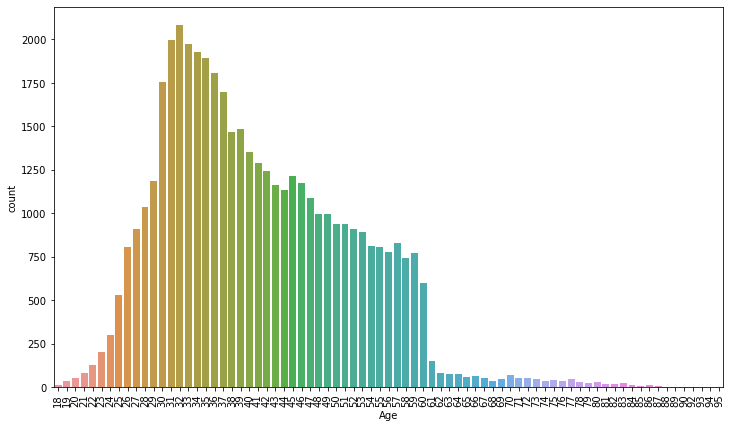

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


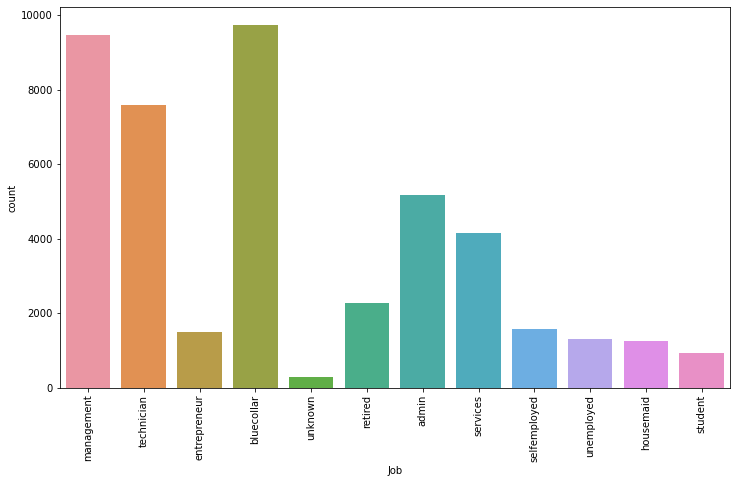

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


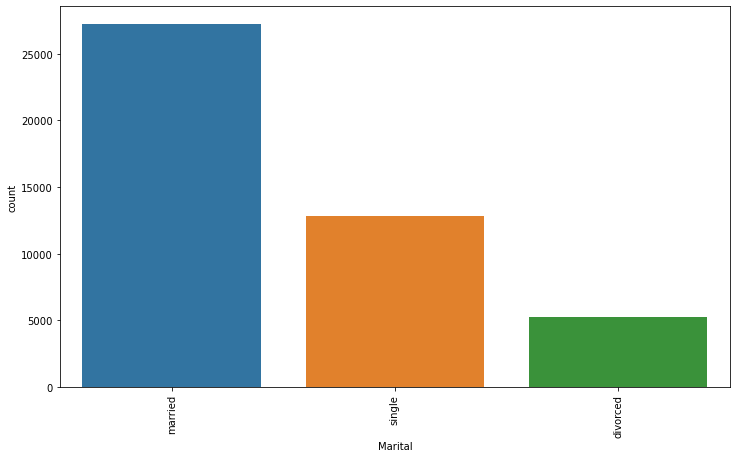

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


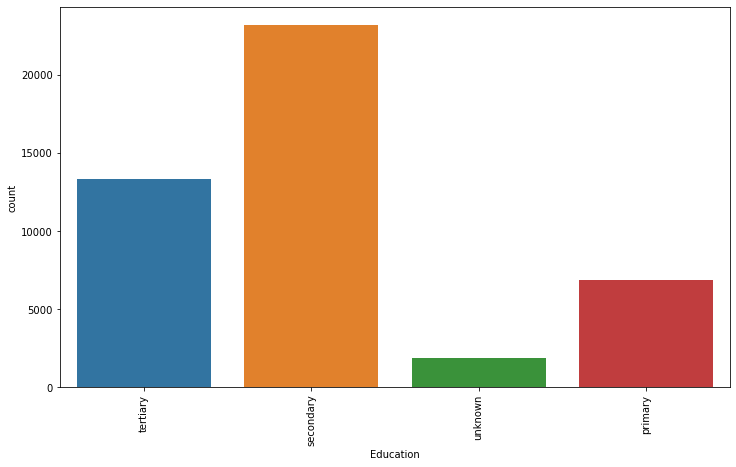

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


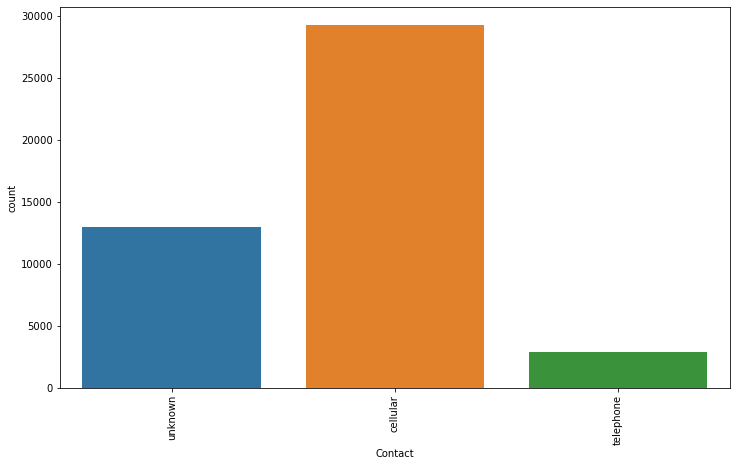

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


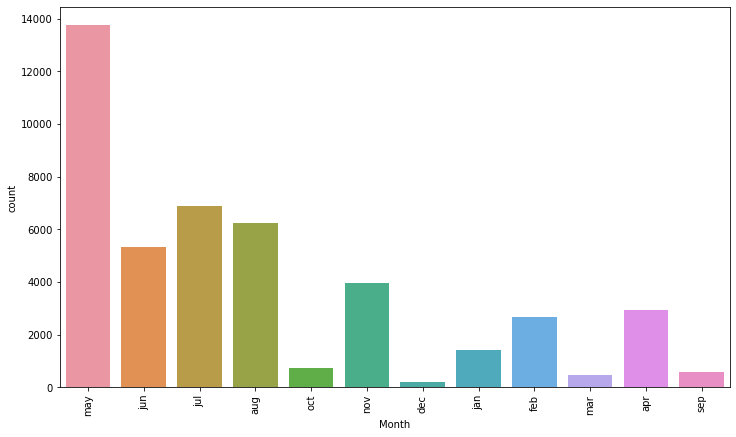

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


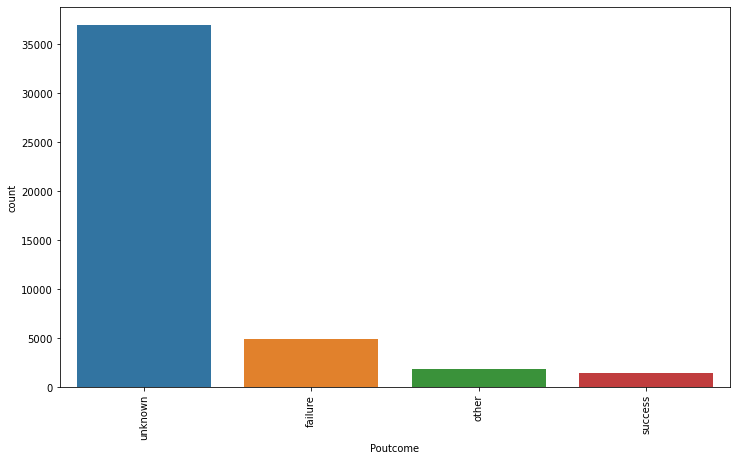

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
Bank_col=['Age','Job','Marital','Education','Contact','Month','Poutcome']
for i in Bank_col:
    plt.figure(figsize=(12,7))
    sns.countplot(i,data=Bank)
    plt.xticks(rotation=90)
    plt.show()

In [24]:
# Converting target into Binary and Visualization 

Bank['Deposit']=Bank['Deposit'].map({'yes':1,'no':0})

In [25]:
Bank

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,1,0,unknown,0
3,47,bluecollar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,bluecollar,married,secondary,no,668,no,no,telephone,17,nov,508,4,1,0,unknown,0


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


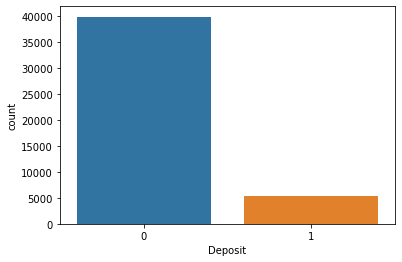

In [26]:
sns.countplot('Deposit',data=Bank)
plt.show()

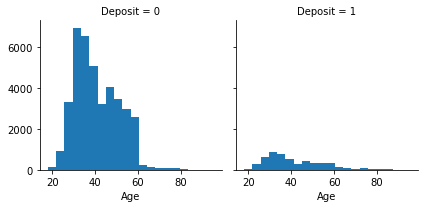

In [27]:
age=sns.FacetGrid(Bank,col='Deposit')
age.map(plt.hist,'Age',bins=20)
plt.show()

In [28]:
job=Bank[['Job','Deposit']].groupby(['Job'],as_index=False).mean().sort_values(ascending=False,by='Deposit')

In [29]:
job

,Job,Deposit
8,student,0.286780
5,retired,0.227915
10,unemployed,0.155027
4,management,0.137556
0,admin,0.122027
6,selfemployed,0.118429
11,unknown,0.118056
9,technician,0.110570
7,services,0.088830
3,housemaid,0.087903


<AxesSubplot:xlabel='Job', ylabel='Deposit'>

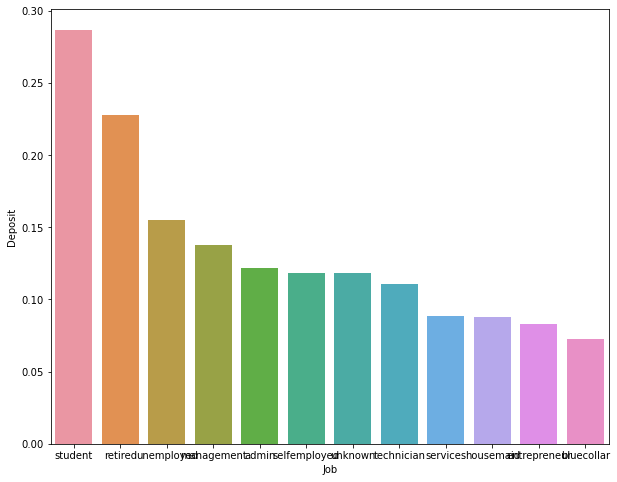

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(x='Job',y='Deposit',data=job)

In [31]:
Bank[['Education','Deposit']].groupby(['Education'],as_index=False).mean().sort_values(ascending=False,by='Deposit')

,Education,Deposit
2,tertiary,0.150064
3,unknown,0.135703
1,secondary,0.105594
0,primary,0.086265


In [32]:
Bank[['Default','Deposit']].groupby(['Default'],as_index=False).mean()

,Default,Deposit
0,no,0.117961
1,yes,0.063804


In [33]:
Bank[['Housing','Deposit']].groupby(['Housing'],as_index=False).mean()

,Housing,Deposit
0,no,0.167024
1,yes,0.077000


In [34]:
Bank[['Loan','Deposit']].groupby(['Loan'],as_index=False).mean()

,Loan,Deposit
0,no,0.126557
1,yes,0.066814


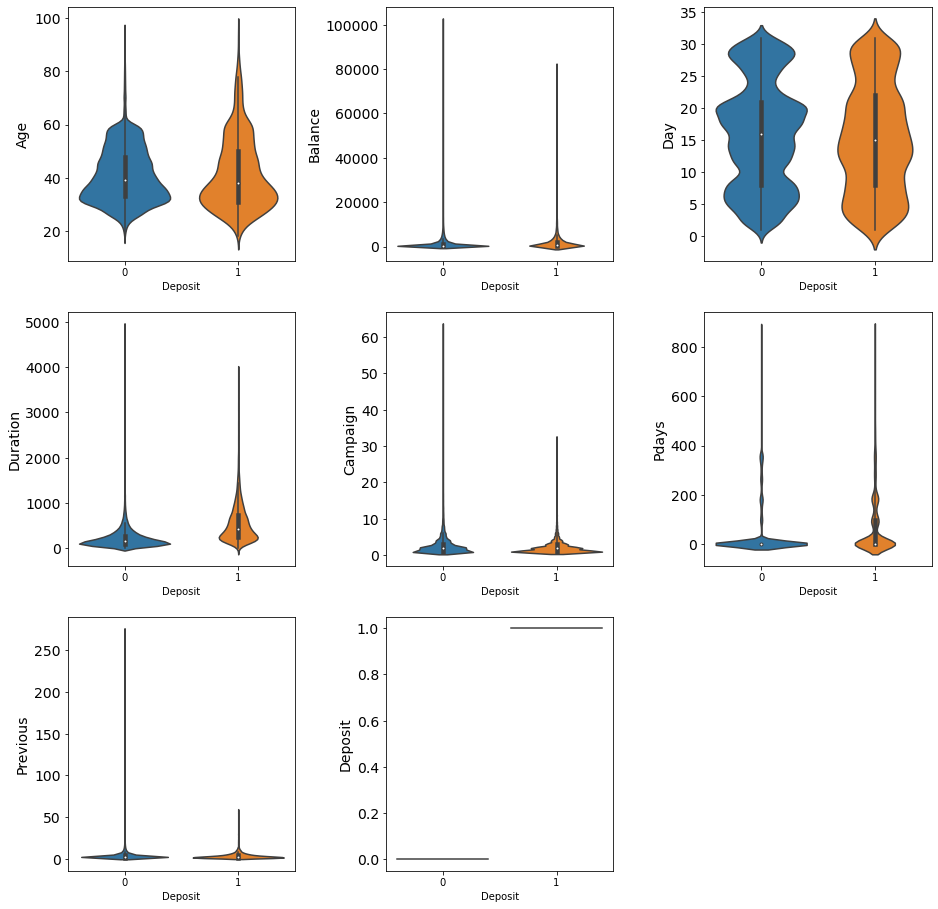

In [35]:
# Checking Outliners and Remove outliners by using IQR method

Bank_num = Bank.select_dtypes('int').columns
plt.figure(figsize = (15, 15))
for idx, col in enumerate(Bank_num):
    plt.subplot(3, 3, idx + 1)
    if col == 'Pdays':
        ax = sns.violinplot(data = Bank, y = Bank[Bank[col] > -1][col], x = Bank.Deposit, inner = 'box')
    elif col == 'Previous':
        ax = sns.violinplot(data = Bank, y = Bank[Bank[col] > 0][col], x = Bank.Deposit, inner = 'box')
    else:
        ax = sns.violinplot(data = Bank, y = Bank[col], x = Bank.Deposit)
    plt.ylabel(col, fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.2)

In [36]:
def outliner(Bank,col_name):
    
    if col_name == 'Pdays':
        Q1 = np.quantile(Bank[Bank[col_name] > -1][col_name],0.25)
        Q3 = np.quantile(Bank[Bank[col_name] > -1][col_name],0.75)
    elif col_name == 'Previous':
        Q1 = np.quantile(Bank[Bank[col_name] > 0][col_name],0.25)
        Q3 = np.quantile(Bank[Bank[col_name] > 0][col_name],0.75)
    else:
        Q1 = np.quantile(Bank[col_name],0.25)
        Q3 = np.quantile(Bank[col_name],0.75)
        
    IQR = Q3 - Q1

    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)

    print("Lower Limit: %.2f" % lower_limit)
    print("Upper Limit: %.2f" % upper_limit)

    Bank_new = Bank[(Bank[col_name] > lower_limit) & (Bank[col_name] < upper_limit)]
    
    print('Outlier count for ' + col_name + ': ' + str(Bank.shape[0] - Bank_new.shape[0]))
    print('Outlier density for ' + col_name + ': ' + str(round((1 - Bank_new.shape[0] / Bank.shape[0]) * 100, 4)) + '%')
    print('========')

In [37]:
for col in Bank_num:
    outliner(Bank, col)

Lower Limit: 10.50
Upper Limit: 70.50
Outlier count for Age: 487
Outlier density for Age: 1.0772%
Lower Limit: -1811.50
Upper Limit: 3384.50
Outlier count for Balance: 4851
Outlier density for Balance: 10.7297%
Lower Limit: -11.50
Upper Limit: 40.50
Outlier count for Day: 0
Outlier density for Day: 0.0%
Lower Limit: -221.00
Upper Limit: 643.00
Outlier count for Duration: 3247
Outlier density for Duration: 7.1819%
Lower Limit: -2.00
Upper Limit: 6.00
Outlier count for Campaign: 4355
Outlier density for Campaign: 9.6326%
Lower Limit: 1.00
Upper Limit: 1.00
Outlier count for Pdays: 45211
Outlier density for Pdays: 100.0%
Lower Limit: -3.50
Upper Limit: 8.50
Outlier count for Previous: 453
Outlier density for Previous: 1.002%
Lower Limit: 0.00
Upper Limit: 0.00
Outlier count for Deposit: 45211
Outlier density for Deposit: 100.0%


III. EXPLORATION DATA ANALYSIS

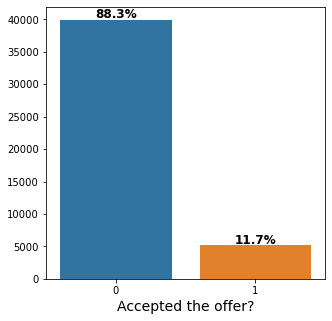

In [38]:
plt.figure(figsize=(5,5))
ax = sns.countplot(data = Bank, x = 'Deposit')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{round(height * 100 / Bank.shape[0], 2)}%', (x + width/2, y + height * 1.01), ha='center', weight = 'bold', fontsize = 12)
plt.xlabel(r'Accepted the offer?', fontsize = 14)
plt.ylabel(r'')
plt.show()

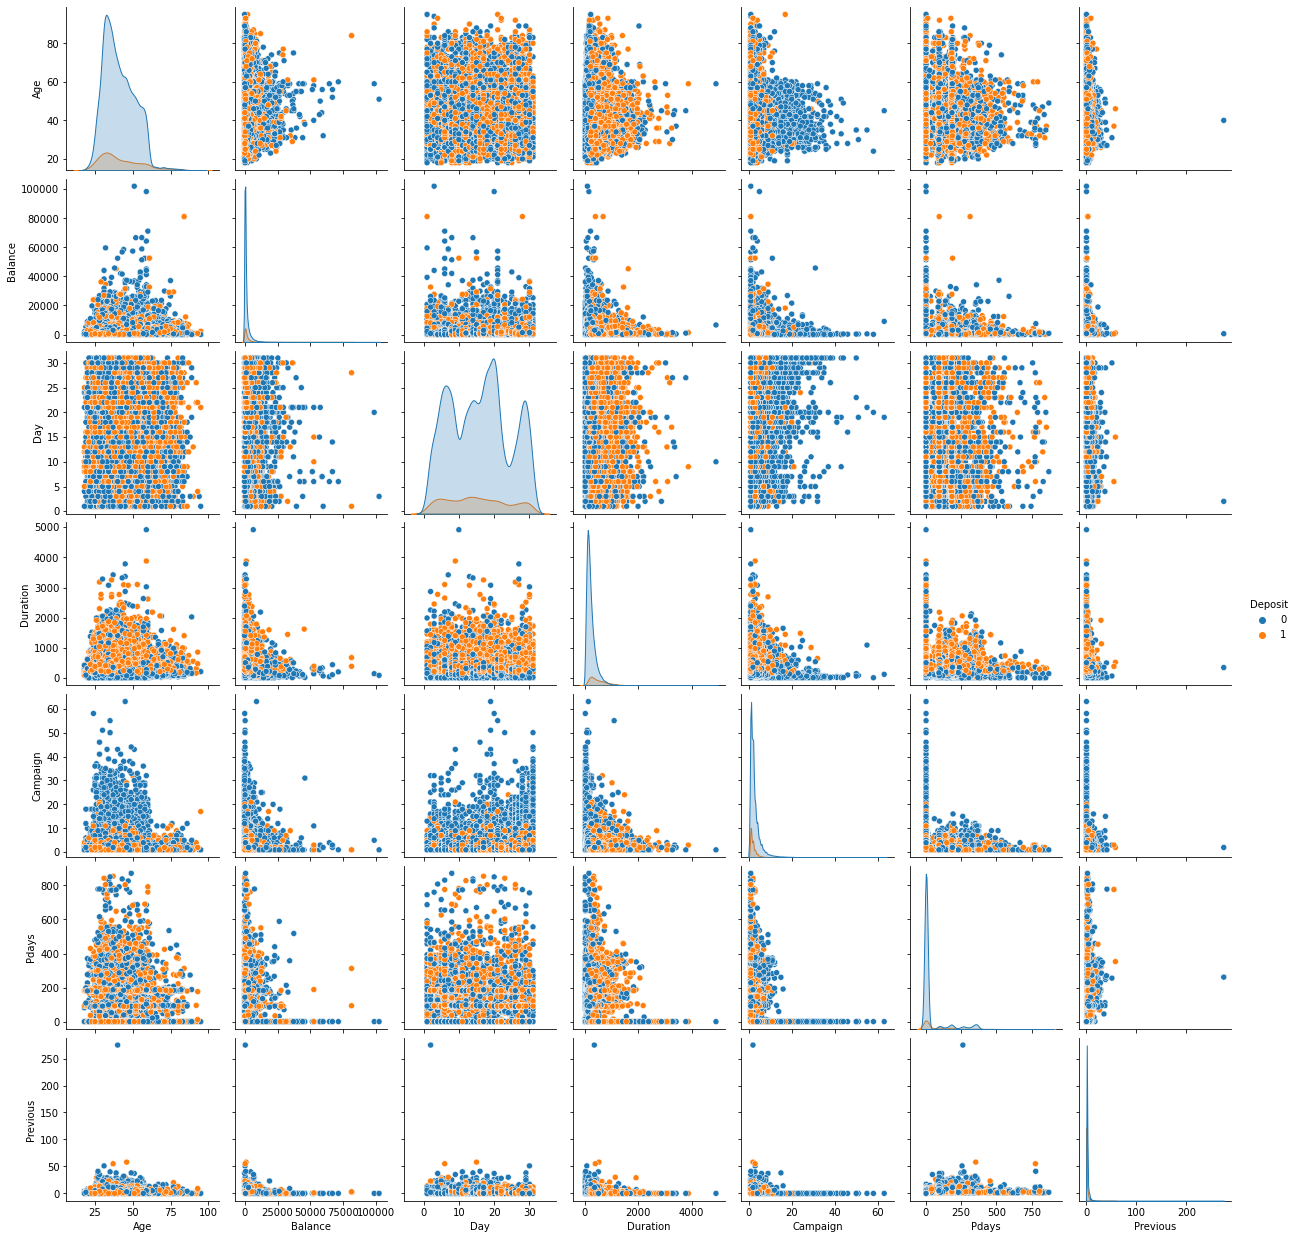

In [39]:
col = ['Age', 'Balance', 'Day', 'Duration','Campaign', 'Pdays', 'Previous', 'Deposit']
sns.pairplot(data = Bank[col], hue = 'Deposit')

In [40]:
category = Bank.select_dtypes('object')

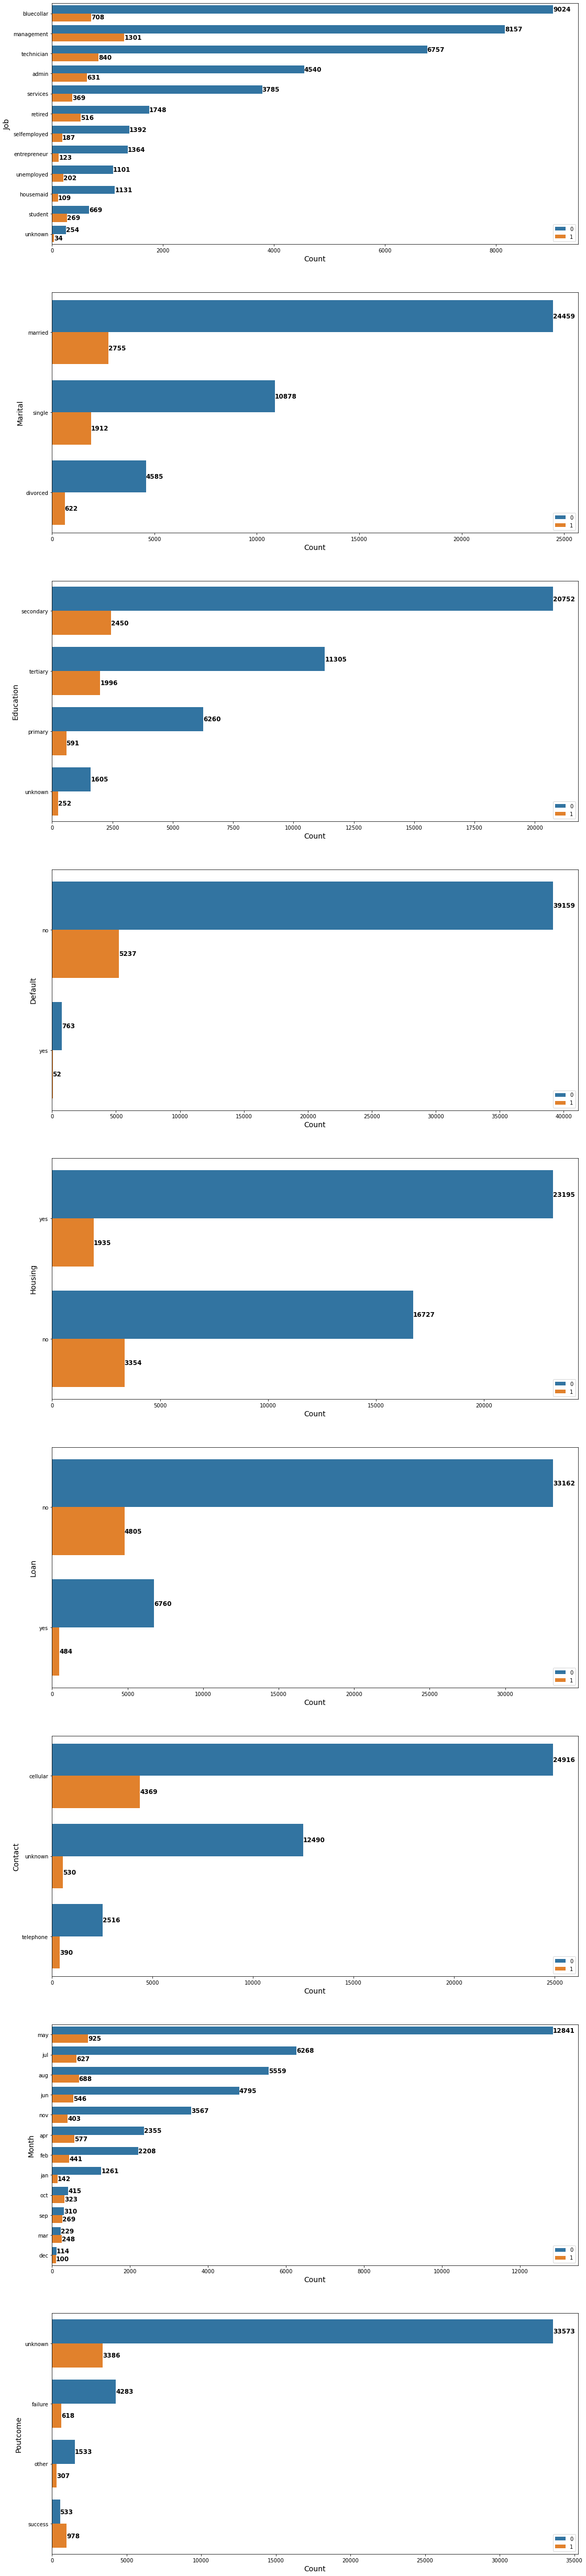

In [41]:
plt.figure(figsize=(18,120))
for idx, col in enumerate(category.columns):
    plt.subplot(12,1,idx + 1)
    ax = sns.countplot(data = Bank, y = Bank[col], hue = Bank['Deposit'],order = Bank[col].value_counts().index);
    plt.ylabel(col, fontsize = 14)
    plt.xlabel('Count', fontsize = 14)
    for col in ax.containers:   
        ax.bar_label(col, weight = 'bold', fontsize = 12)
    plt.legend(loc = 'lower right')

IV. DATA PREMODELING

In [42]:
from sklearn.preprocessing import LabelEncoder
Bank['Job']= LabelEncoder().fit_transform(Bank['Job']) 
Bank['Marital']= LabelEncoder().fit_transform(Bank['Marital']) 
Bank['Education']= LabelEncoder().fit_transform(Bank['Education']) 
Bank['Default']= LabelEncoder().fit_transform(Bank['Default']) 
Bank['Housing']= LabelEncoder().fit_transform(Bank['Housing']) 
Bank['Loan']= LabelEncoder().fit_transform(Bank['Loan']) 
Bank['Contact']=LabelEncoder().fit_transform(Bank['Contact'])
Bank['Month']=LabelEncoder().fit_transform(Bank['Month'])


In [43]:
def Age(dataframe):
    dataframe.loc[dataframe['Age'] <= 32, 'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 32) & (dataframe['Age'] <= 47), 'Age'] = 2
    dataframe.loc[(dataframe['Age'] > 47) & (dataframe['Age'] <= 70), 'Age'] = 3
    dataframe.loc[(dataframe['Age'] > 70) & (dataframe['Age'] <= 98), 'Age'] = 4  
    return dataframe

Age(Bank);

In [44]:
Bank['Poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [45]:
Bank['Poutcome'].replace(['unknown', 'failure','other','success'], [1,2,3,4], inplace  = True)

In [46]:
def duration(data):

    data.loc[data['Duration'] <= 102, 'Duration'] = 1
    data.loc[(data['Duration'] > 102) & (data['Duration'] <= 180)  , 'Duration']    = 2
    data.loc[(data['Duration'] > 180) & (data['Duration'] <= 319)  , 'Duration']   = 3
    data.loc[(data['Duration'] > 319) & (data['Duration'] <= 644.5), 'Duration'] = 4
    data.loc[data['Duration']  > 644.5, 'Duration'] = 5

    return data
duration(Bank);

In [47]:
Bank.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Deposit
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,1,0,1,0
1,2,9,2,1,0,29,1,0,2,5,8,2,1,1,0,1,0
2,2,2,1,1,0,2,1,1,2,5,8,1,1,1,0,1,0
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,1,0,1,0
4,2,11,2,3,0,1,0,0,2,5,8,3,1,1,0,1,0


V. DATA MODELING

In [48]:
X=Bank.drop('Deposit',axis=1)
y=Bank.Deposit

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
K_fold=KFold(n_splits=10, shuffle=True,random_state=0)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [50]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X_train=SC.fit_transform(X_train)
X_test=SC.fit_transform(X_test)

In [51]:
from sklearn.linear_model import LogisticRegression
LG=LogisticRegression()
LG.fit(X_train,y_train)
Prediction=LG.predict(X_test)
print(confusion_matrix(y_test, Prediction))
print(round(accuracy_score(y_test, Prediction),2)*100)
LGCV = (cross_val_score(LG, X_train, y_train, cv=K_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7791  189]
 [ 772  291]]
89.0


In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=K_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7861  119]
 [ 874  189]]
89.0


In [53]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=K_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7134  846]
 [ 721  342]]
83.0


In [54]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=K_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7345  635]
 [ 558  505]]
87.0


In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=K_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7692  288]
 [ 612  451]]
90.0


In [56]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=K_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7055  925]
 [ 550  513]]
84.0


In [57]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:47] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[7648  332]
 [ 579  484]]
90.0
[19:14:49] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:51] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:54] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:56] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:58] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:59] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:15:01] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:15:03] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:15:05] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:15:06] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=K_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7709  271]
 [ 651  412]]
90.0


In [59]:
models = pd.DataFrame({'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine','K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LGCV, GAUSIAN, XGB, GBKCV]})
models.sort_values(by='Score', ascending=True)

,Models,Score
5,Gausian NB,0.838116
2,Support Vector Machine,0.840854
1,Decision Tree Classifier,0.872595
3,K-Near Neighbors,0.894492
4,Logistic Model,0.896234
0,Random Forest Classifier,0.902096
7,Gradient Boosting,0.904197
6,XGBoost,0.906409


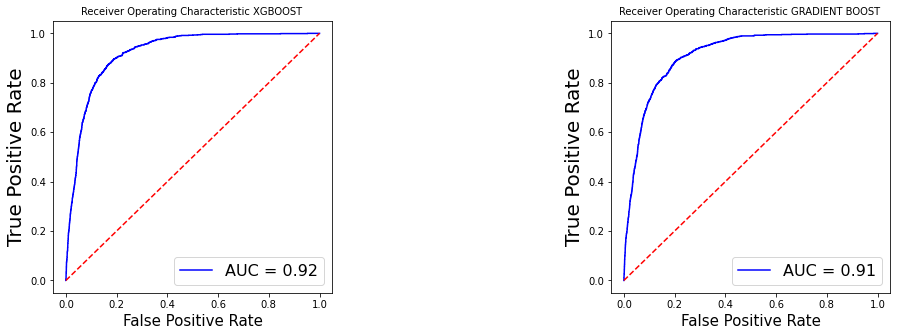

In [60]:
# XGBOOST ROC/ AUC 
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

#Gradient
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

/var/folders/zm/pjfj84dx07df_wwx0sbd5j9r0000gn/T/ipykernel_7040/3281153632.py:69: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
/var/folders/zm/pjfj84dx07df_wwx0sbd5j9r0000gn/T/ipykernel_7040/3281153632.py:70: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
/var/folders/zm/pjfj84dx07df_wwx0sbd5j9r0000gn/T/ipykernel_7040/3281153632.py:71: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
/var/folders/

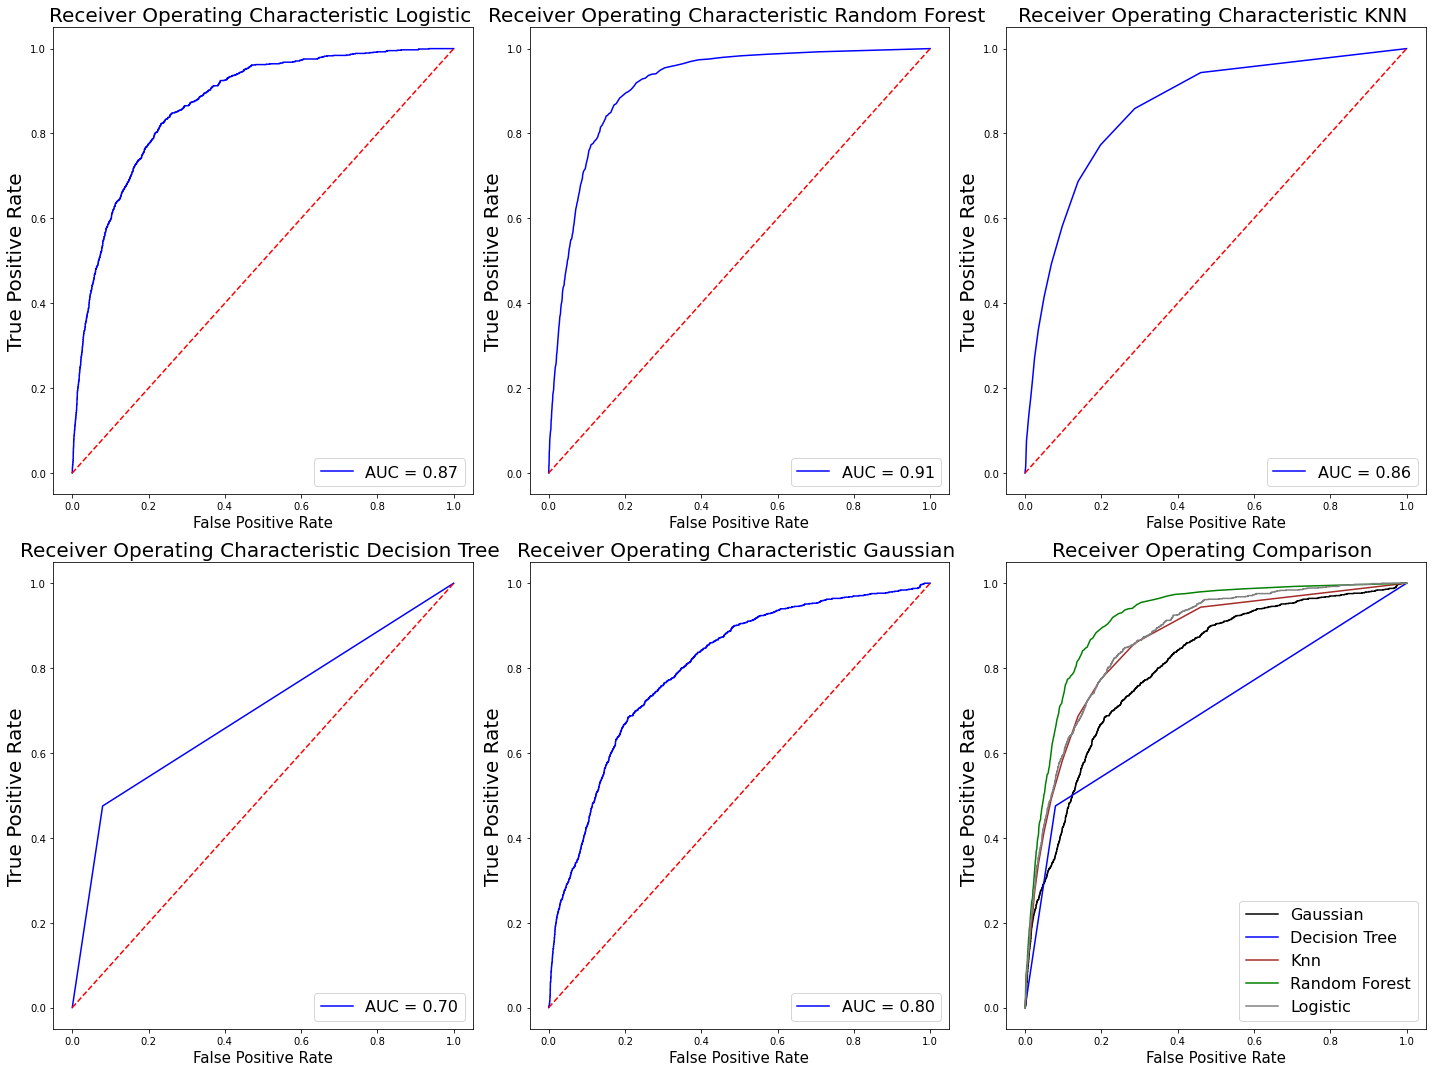

In [61]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = LG.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

In [62]:
from sklearn.metrics import classification_report
print('KNN Confusion Matrix\n', confusion_matrix(y_test, knnpred))

KNN Confusion Matrix
 [[7861  119]
 [ 874  189]]


In [63]:
print('KNN Reports\n',classification_report(y_test, knnpred))

KNN Reports
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7980
           1       0.61      0.18      0.28      1063

    accuracy                           0.89      9043
   macro avg       0.76      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



VI. CONCLUSION

Banking Dataset we are explored is involving information regarding telephone marketing campaigns with clients whether or not they were contacted and subscribed for term deposit. Different models were created  and analysis. It was found that models performances are good by accuracy and ROC-AUC score. However, there are some improvement by using different models or doing hyperparameter optimization. Specifically on the metrics for predicting our minority class people who will invest term deposits when called by telephone marketing campaigners.